<a href="https://colab.research.google.com/github/deen360/Stock_Analysis/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
from tabulate import tabulate

import time
from datetime import date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
#get today's date
end = date.today()

#print ou the gotten date
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

#start year is this year - 70 years
start = date(year=end.year-70, month=end.month, day=end.day)

print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 5; day=8
Period for indexes: 1954-05-08 to 2024-05-08 


In [3]:
# Real Potential Gross Domestic Product (gdpc1), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1

#get data from fred site where start is the start date GDPC1 is the data you want to get
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)


#Formular for GDP growth rate is =  yoy( year on year analysis) = (current year / old Year) - 1   => where the anwser is in percentage

#create a column for the GDPCX for the year where GDPCX is Previous year of the current quater
gdpc1['GDPCX'] = gdpc1.GDPC1.shift(4)

gdpc1.tail()



,GDPC1,GDPCX
DATE,,
2023-01-01,22112.329,21738.871
2023-04-01,22225.350,21708.160
2023-07-01,22490.692,21851.134
2023-10-01,22679.255,21989.981
2024-01-01,22768.866,22112.329


### ***TO Calculate the Quaterly GDP***

In [4]:
#Therefor GDPC1 for quater on quater = (Current quater / Previous year of the current quater ) - 1
# GDPC1 = Current quater
# GDPCX = Previous year of the current quater
# (GDPC1 / GDPCX) - 1

gdpc1['gdpc1_us_qoq']  = (gdpc1.GDPC1 / gdpc1.GDPCX) - 1

gdpc1.head()

,GDPC1,GDPCX,gdpc1_us_qoq
DATE,,,
1954-07-01,2880.482,NaN,NaN
1954-10-01,2936.852,NaN,NaN
1955-01-01,3020.746,NaN,NaN
1955-04-01,3069.910,NaN,NaN
1955-07-01,3111.379,2880.482,0.080159


### ***TO Calculate the Annual GDP***

In [5]:
# Create an empty DataFrame to store the averages
averages_df = pd.DataFrame(columns=['Year', 'Average_gdpc1_us_qoq', 'Average_GDPC1'])

# Iterate over years
for year in range(gdpc1.index.min().year, gdpc1.index.max().year + 1):
    # Filter DataFrame for the current year
    year_df = gdpc1[gdpc1.index.year == year]

    # Calculate the average for the current year
    avg_qoq = year_df['gdpc1_us_qoq'].mean()
    avg_gdpc1 = year_df['GDPC1'].mean()

    # Append the average to the DataFrame
    averages_df = pd.concat([averages_df, pd.DataFrame({'Year': [year], 'Average_gdpc1_us_qoq': [avg_qoq], 'Average_GDPC1' : [avg_gdpc1] })])

# Set the 'Year' column as the index
averages_df.set_index('Year', inplace=True)

averages_df.head()

,Average_gdpc1_us_qoq,Average_GDPC1
Year,,
1954,NaN,2908.66700
1955,0.072975,3083.02575
1956,0.021413,3148.76500
1957,0.021146,3215.06525
1958,-0.007401,3191.21600


# Visuals GDPC1

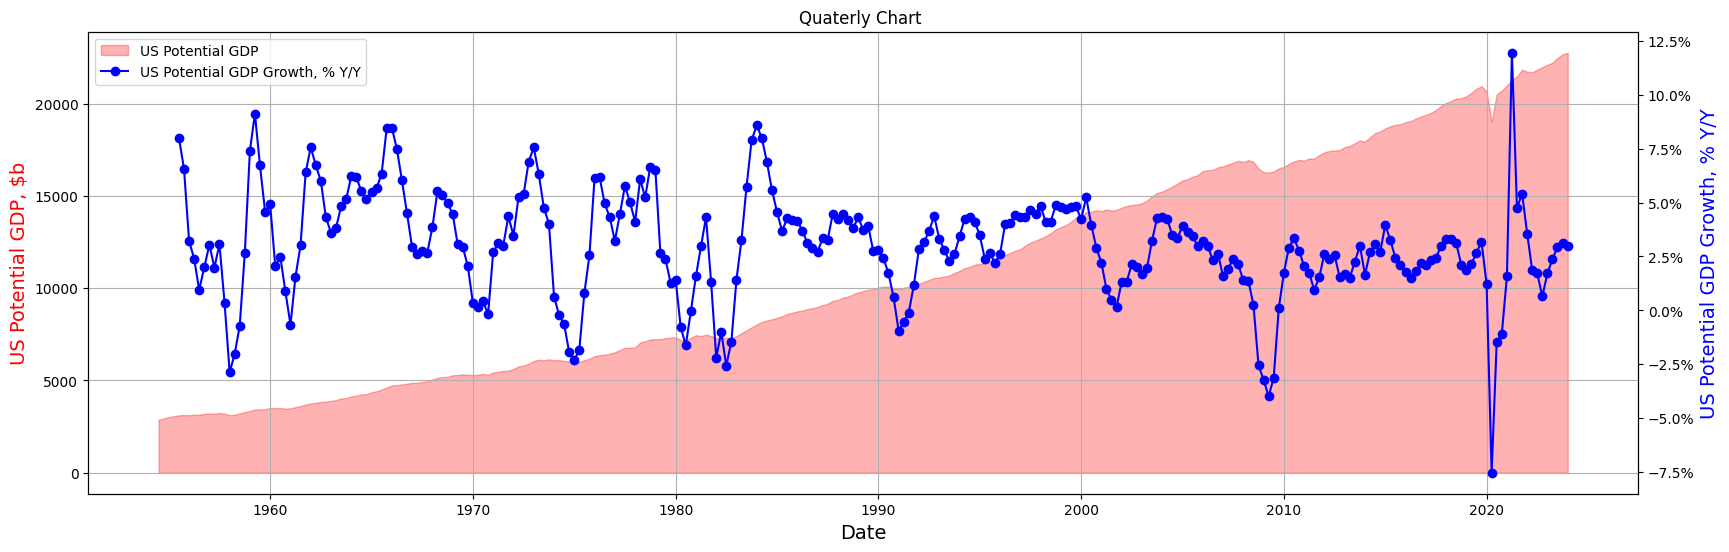

In [6]:
#size of Figure and add the grid
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)


# Plotting area under US potential GDP curve
#in red we plot the the year on the x axis and the GDPC1 on the y axis
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_qoq, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title("Quaterly Chart ")

plt.show()

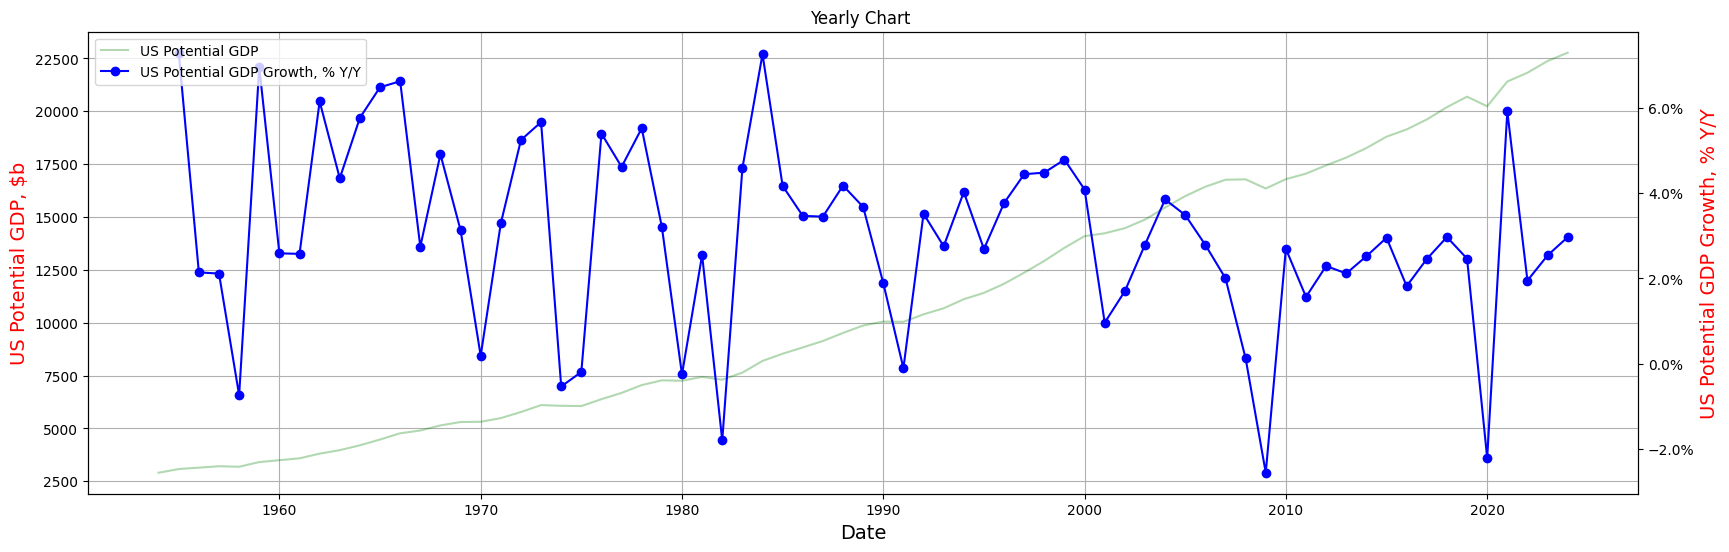

In [7]:
#size of Figure and add the grid
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)


ax.plot(averages_df.index, averages_df.Average_GDPC1, color="green", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(averages_df.Average_gdpc1_us_qoq, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="red", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title("Yearly Chart ")

plt.show()

# **Inverse "Treasury Yield"**

Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

In [8]:
#https://fred.stlouisfed.org/series/DGS10.

start = "2000-01-01";
df_dsg10 = pdr.DataReader("DGS10", "fred", start=start, end=end)
df_dsg10.head(10)

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52
2000-01-10,6.57
2000-01-11,6.67
2000-01-12,6.72
2000-01-13,6.63


In [9]:
#https://fred.stlouisfed.org/series/DGS2

df_dsg2 = pdr.DataReader("DGS2", "fred", start=start, end=end)
df_dsg2.head(10)

,DGS2
DATE,
2000-01-03,6.38
2000-01-04,6.30
2000-01-05,6.38
2000-01-06,6.35
2000-01-07,6.31
2000-01-10,6.38
2000-01-11,6.45
2000-01-12,6.49
2000-01-13,6.40


In [10]:
df_diff =  pd.DataFrame(index=df_dsg10.index, columns=["DGS10", "DGS2","DIFF"])

df_diff["DGS2"] = df_dsg2.DGS2
df_diff["DGS10"] = df_dsg10.DGS10
df_diff["DIFF"] = df_diff.DGS10 - df_diff.DGS2
df_diff.tail()
df_diff.min()

DGS10    0.52
DGS2     0.09
DIFF    -1.08
dtype: float64

# ***The inverse treasury yield is assumed to be -1.08***

###q3 = [Index] Which Index is better recently?

S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/).

In [11]:
# WEB: https://finance.yahoo.com/quote/%5EGSPC/
start="2019-04-09";end= "2024-04-09";

df_gspc = yf.download(tickers = "^GSPC",
                     start = start,
                      end = end,
                     interval = "1d")


df_gspc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000
...,...,...,...,...,...,...
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000


In [12]:
# WEB: https://finance.yahoo.com/quote/%5EGSPC/
df_mxx = yf.download(tickers = "^MXX",
                     start = start,
                      end = end,
                     interval = "1d")


df_mxx

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100
...,...,...,...,...,...,...
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700


In [13]:
df_gspc_inv = (df_gspc["Adj Close"].iloc[-1] / df_gspc["Adj Close"].iloc[0]) - 1;
df_mxx_inv = (df_mxx["Adj Close"].iloc[-1] / df_mxx["Adj Close"].iloc[0]) - 1


In [14]:
df_gspc_inv, df_mxx_inv

(0.8075151917783085, 0.2843377484045295)

In [15]:
print(f"largest value as an answer (%) {df_gspc_inv.round(2) * 100}")

largest value as an answer (%) 81.0


## *largest value as an answer in (%)  is 81.0*

# CAGR Calculation


In [16]:
def calculate_cagr(initial_value, final_value, num_years):
    return (final_value / initial_value) ** (1 / num_years) - 1


In [17]:
# Example values (replace these with actual data)
initial_value = df_gspc["Adj Close"].iloc[0]  # Initial value of the index
final_value = df_gspc["Adj Close"].iloc[-1]
num_years = 5

# Calculate CAGR
cagr = calculate_cagr(initial_value, final_value, num_years)

print("CAGR:", cagr)

CAGR: 0.12568373554888068


### [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

In [18]:
#Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023
#Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.
#Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history
#Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)
#(Additional: why this may be important for your research?)

In [19]:
def calc_ohlvc(df):
  ohlvc = (df["Adj Close"].max() - df["Adj Close"].min()) / df["Adj Close"].max()
  return ohlvc

def load_data(start, end, tickers):
  df = yf.download(tickers = tickers,
                     start = start,
                      end = end,
                     interval = "1d",
                   actions = True)


  diff = calc_ohlvc(df)
  return df, diff.round(2)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


the OHLVC for 2222.SR is 0.21
the OHLVC for BRK-B is 0.21


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


the OHLVC for AAPL is 0.37
the OHLVC for MSFT is 0.42


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


the OHLVC for GOOG is 0.39
the OHLVC for JPM is 0.28


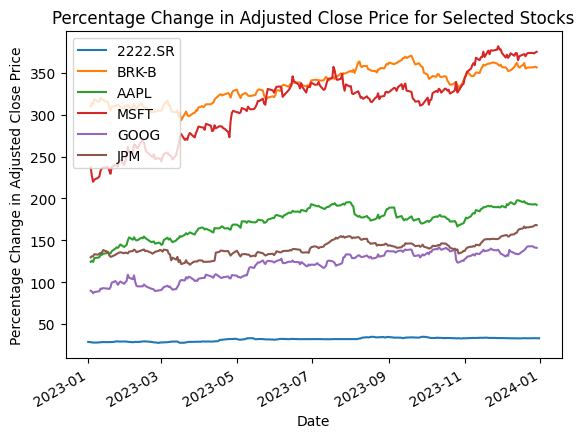

In [20]:
#BRK-B, AAPL, MSFT, GOOG, JPM
start = "2023-01-01"; end = "2024-01-01";
all_ohlvc = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]
all = []
for i in all_ohlvc:
  df, df_diff = load_data(start, end, i)
  all.append(df_diff)
  df['Adj Close'].plot(label=i)
  print(f"the OHLVC for {i} is {df_diff}")

plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage Change in Adjusted Close Price')
plt.title('Percentage Change in Adjusted Close Price for Selected Stocks')
plt.show()

Stocks - Dividend Yield (1 point)

In [21]:
max(all)

0.42

## *The max OHLVC is 0.42 for MSFT*

# ***Stocks - Dividend Yield***

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25
dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3) italicised text

In [22]:
df_x = yf.download(tickers = "MSFT",
                     start = start,
                      end = end,
                     interval = "1d",
                     actions = True)

df_x.Dividends.sum()

[*********************100%%**********************]  1 of 1 completed


2.79

In [23]:
start = "2023-01-01"; end = "2024-01-01"; tickers = "2222.SR"
df_sr, diff_sr =  load_data(start, end, tickers)

[*********************100%%**********************]  1 of 1 completed


In [24]:
df_sr

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2023-01-01,29.227272,29.454544,29.181818,29.454544,28.475794,1569087,0.0,0.0
2023-01-02,29.545454,29.545454,29.227272,29.227272,28.256075,4693364,0.0,0.0
2023-01-03,29.227272,29.227272,29.227272,29.227272,28.256075,0,0.0,0.0
2023-01-04,29.181818,29.227272,28.681818,28.818180,27.860575,4618455,0.0,0.0
2023-01-05,28.818180,28.818180,28.363636,28.681818,27.728743,4797670,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070,0.0,0.0
2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967,0.0,0.0
2023-12-27,33.099998,33.250000,33.000000,33.150002,32.977268,14815683,0.0,0.0


In [34]:
def div_yield(df):

  df_yield = (df.Dividends.sum() / df["Adj Close"].iloc[-1]) * 100
  return df_yield.round(1)

In [53]:
start = "2023-01-01"; end = "2024-01-01";
all_ohlvc = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]
all_yield = []
for i in all_ohlvc:
  df, df_diff = load_data(start, end, i)
  df_yield = div_yield(df)
  all_yield.append(df_yield)


  print(f"the yeild for {i} in 2023 is {df_yield}%")
print(f"max yeild is {max(all_yield)} %")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

the yeild for 2222.SR in 2023 is 2.8%
the yeild for BRK-B in 2023 is 0.0%
the yeild for AAPL in 2023 is 0.5%
the yeild for MSFT in 2023 is 0.7%
the yeild for GOOG in 2023 is 0.0%
the yeild for JPM in 2023 is 2.4%
max yeild is 2.8 %


## *max yeild is 2.8 % 2222.SR in 2023*

---

